**COVID-19 TWEETER SENTIMENT ANALYSIS**

**TASK 1 - Indian Sentiment analysis after 3 lockdowns using Tweets**

**Team Name -** Team Goal Achiever

**Team Members :-**

*   Divya Rajput
*   Harishankar Kumar


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Collecting tweets on COVID-19

In [0]:
## defining keys

consumer_key= 'ZiZqfc1gWoFp9DQZpz4j7uCQx'
consumer_secret= 'iJh3tedvla6dqFrnGhuT1tfrLjTnjKYhJRnmKQ370wtlaAJPV5'
access_token= '1259189821832073223-Tk2t8AFZjyiHBfxcJuxodw9deHFQB2'
access_token_secret= 'y5ZE6Wof6hBNQm1LcYC2uDCvG1ZvYiHmvR87sewMHmP35'

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [0]:
### collecting and cleaning 1000 tweets on covid

def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

# Create a custom search term and define the number of tweets
search_term = "#covid19 OR #covid-19 OR covid-19 OR covid19 OR #coronavirus OR coronavirus -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2020-02-24').items(1000)

# Remove URLs
tweets_no_urls = [remove_url(tweet.text) for tweet in tweets]

In [4]:
len(tweets_no_urls)

1000

In [5]:
type(tweets_no_urls)

list

## Sentiment analysis using TextBlob

In [6]:
# Create textblob objects of the collected tweets
sentiment_objects = [TextBlob(tweet) for tweet in tweets_no_urls]

sentiment_objects[1].polarity, sentiment_objects[1]

(0.0,
 TextBlob("IndiaFightsCoronaFollow distancing norms in all public places Keep yourself and others protected from COVID19"))

In [7]:
# Create list of polarity values and tweet texts
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_values[1]

[0.0,
 'IndiaFightsCoronaFollow distancing norms in all public places Keep yourself and others protected from COVID19']

In [8]:
# Create dataframe containing the polarity value and tweet text
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity_score", "tweet"])
pd.set_option('display.max_colwidth', None)
sentiment_df.head(10)

,polarity_score,tweet
0,0.000000,JoeNBC Coronavirus has been cancelled by protests
1,0.000000,IndiaFightsCoronaFollow distancing norms in all public places Keep yourself and others protected from COVID19
2,0.136364,AwkJes I live just along the coast from Ian his residence and croft where he keeps animals He never came up he
3,0.500000,As COVID19 restrictions begin to be eased in many countries more and more scientists can safely return to the lab
4,0.300000,MelissaAFrancis To be honest Melissa the CDC WHO and all of the associated medical organizations knew the asymp
5,0.000000,codacorpusa looks at the FDAs response to COVID19 and what lessons can be learned for future health crises
6,0.400000,Today is the day There is still time to register for our free Using EMDR to Health Reproductive Health Trauma webi
7,0.000000,Covid19 Xbox Series X chief discusses pandemic launch plan
8,-0.066667,The total number of COVID19 cases in Himachal Pradesh is now 437 including 184 active cases 237 recovered and 5 de
9,0.118182,New expert group will work with scotgov to give a clear picture of the impact on minority ethnic communities of co


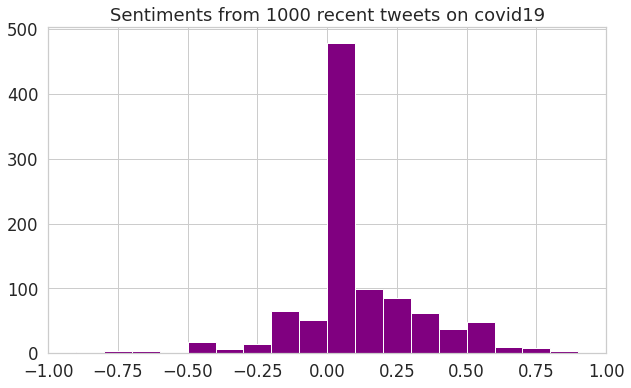

In [9]:
## Histogram of tweet sentiments

import numpy as np

bin_range = np.arange(-1, 1, 0.1)

fig, ax = plt.subplots(figsize=(10, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=bin_range,
             ax=ax,
             color="purple")

plt.xlim(-1, 1)
plt.title("Sentiments from 1000 recent tweets on covid19")
plt.show()

In [0]:
# Remove polarity values which equal to zero to get more valuable distribution

sentiment_df_nz = sentiment_df[sentiment_df.polarity_score != 0]

fig, ax = plt.subplots(figsize=(10, 6))

# Plot histogram with break at zero
sentiment_df_nz.hist(bins=bin_range,
             ax=ax,
             color="blue")

plt.xlim(-1, 1)
plt.title("Sentiments from 1000 recent tweets on covid-19")
plt.show()

In [11]:
## 10 most positive tweets about covid-19

sentiment_df_nz_sorted = sentiment_df_nz.sort_values('polarity_score', ascending=False)

pd.set_option('display.max_colwidth', None)

sentiment_df_nz_sorted.head(10)

,polarity_score,tweet
768,1.00,ParleG a household brand since 1938ParleG records best sales in eight decades during Covid19 lockdown period
430,1.00,Job shops have no choice but to work through digitaltransformation Industry 40 is the best tool for the job
837,0.80,Bea Alonzo cant help but feel proud of what John Lloyd Cruz is doing for COVID19 frontliners in Cebu City
241,0.80,KTLAMorningNews You know thats great but I have a question for you what the hell does that have to do with God da
69,0.80,Number 17 out of 200 countries It is an achievement that we are all proud of This is proof that the Saudi governm
660,0.80,Since 2015 SFVWelcomeCtr has been a place of welcome to unaccompanied children who have sought refuge in LA Count
552,0.75,AlecB19 UK should follow successful countries that has dealt with coronavirus
368,0.70,Bars Must Change for Good After Coronavirus
255,0.70,ArzuHosne COVID19 Good luck Hosne I hope your return goes well
745,0.70,outdoorperscrip jessRMCowley AWPNHS Perhaps AWPNHS could learn from good practice in Bath area for connecting w


In [12]:
## 10 most negative tweets about covid-19

pd.set_option('display.max_colwidth', None)

sentiment_df_nz_sorted.tail(10)

,polarity_score,tweet
592,-0.600000,Awardwinning Journalist ElaineWelteroth talks race the police amp the desperate need for change VanderpumpRules
744,-0.600000,Was Iceland on your bucket list this year but you cant go because of COVID19 Check my crazy Icelandic
76,-0.625000,2 students committed suicide as they were unable to attend online classes This is tragic amp it exposes the gaps
620,-0.700000,Did you pick up a bad habit during Covid19 StayAtHome In part one of a threepart series I look at how
644,-0.700000,Is admitting community spread something so bad compared to quoting 5 lakh covid patients in a month
302,-0.714286,In September 2019 all 3 in our family became so sick it took us 5 weeks to heal When ended my wife who works w
344,-0.800000,kr1skraken LFC Its because of covid 19 you idiot
988,-0.800000,schfess Covid19 is killing me and iI must confess i hate quarantinequarantineI miss my friend im losing my
334,-1.000000,Truly shocking MMT
914,-1.000000,How the UK became Europes nation worst affected by Covid19


## Word frequency analysis

In [13]:
## making a list of lists with lower case words from each tweet

lcase_words_tweets = [tweet.lower().split() for tweet in tweets_no_urls]
lcase_words_tweets[:2]

[['joenbc', 'coronavirus', 'has', 'been', 'cancelled', 'by', 'protests'],
 ['indiafightscoronafollow',
  'distancing',
  'norms',
  'in',
  'all',
  'public',
  'places',
  'keep',
  'yourself',
  'and',
  'others',
  'protected',
  'from',
  'covid19']]

In [14]:
# Flattened list of all words across all tweets
all_words_tweets = list(itertools.chain(*lcase_words_tweets))

# Create counter
counts_no_urls = collections.Counter(all_words_tweets)
counts_no_urls.most_common(10)

[('the', 620),
 ('to', 438),
 ('covid19', 374),
 ('of', 351),
 ('in', 269),
 ('and', 261),
 ('a', 220),
 ('coronavirus', 205),
 ('for', 178),
 ('is', 170)]

In [15]:
## downloading stop words library in order to filter out stop words, commonly ysed words like 'a' or 'the'

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stop_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [16]:
# Remove stop words from each tweet list of words with nested list comprehension
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in lcase_words_tweets]

tweets_nsw[1]

['indiafightscoronafollow',
 'distancing',
 'norms',
 'public',
 'places',
 'keep',
 'others',
 'protected',
 'covid19']

In [17]:
# same counter of most common words now without stop words

all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(20)

[('covid19', 374),
 ('coronavirus', 205),
 ('new', 67),
 ('pandemic', 52),
 ('cases', 48),
 ('covid', 44),
 ('people', 44),
 ('health', 41),
 ('help', 34),
 ('us', 33),
 ('amp', 29),
 ('spread', 27),
 ('june', 26),
 ('time', 25),
 ('19', 25),
 ('due', 24),
 ('via', 23),
 ('deaths', 22),
 ('impact', 21),
 ('back', 21)]

In [0]:
## get rid of collection words which are skewing the frequency

collection_words = ['covid19', 'covid 19', 'covid-19', 'covid', "19", "coronavirus", "virus", "corona", 'amp', '19', 'im']
tweets_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]

In [19]:
# Flatten list of words in cleaned tweets_nsw_nc
all_words_nsw_nc = list(itertools.chain(*tweets_nsw_nc))

# Create counter of words in clean tweets
counts_nsw_nc = collections.Counter(all_words_nsw_nc)
counts_nsw_nc.most_common(20)

[('new', 67),
 ('pandemic', 52),
 ('cases', 48),
 ('people', 44),
 ('health', 41),
 ('help', 34),
 ('us', 33),
 ('spread', 27),
 ('june', 26),
 ('time', 25),
 ('due', 24),
 ('via', 23),
 ('deaths', 22),
 ('impact', 21),
 ('back', 21),
 ('china', 21),
 ('news', 21),
 ('world', 21),
 ('government', 21),
 ('one', 20)]

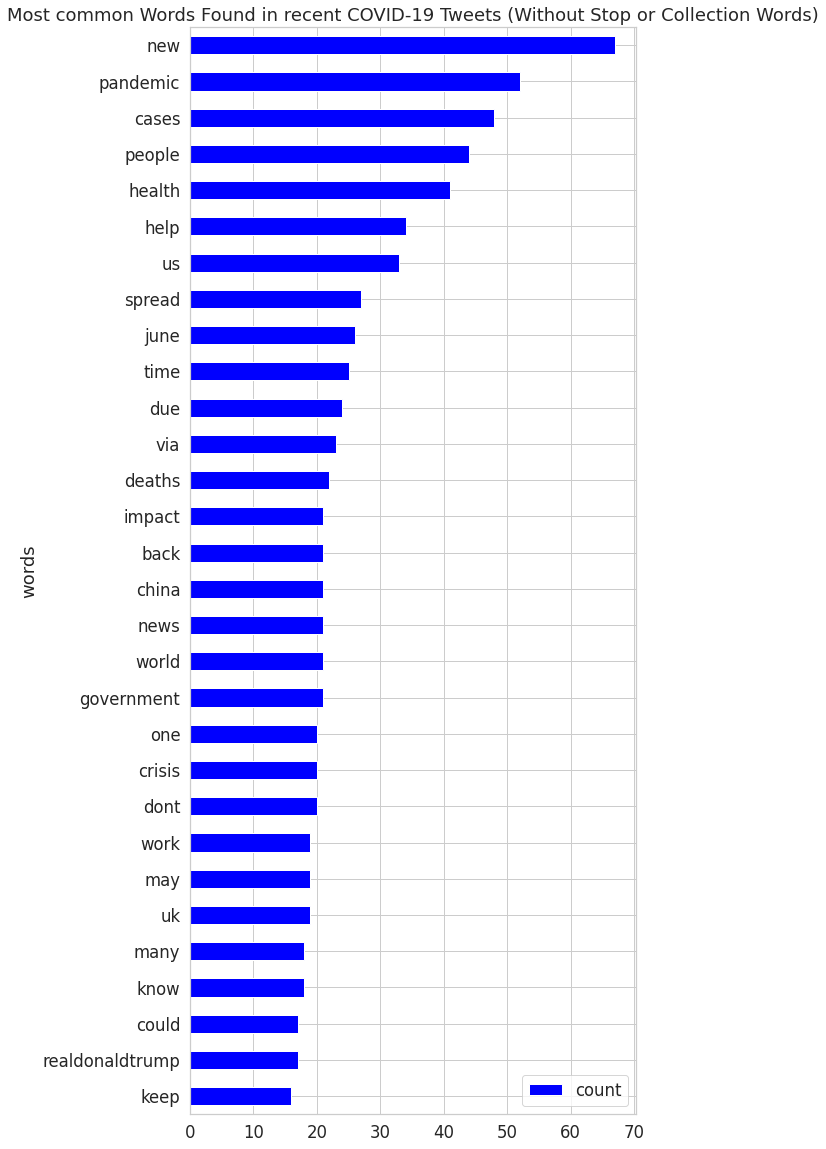

In [20]:
# plotting the most frequent words

all_words_nsw_nc_df = pd.DataFrame(counts_nsw_nc.most_common(30),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 20))

# Plot horizontal bar graph
all_words_nsw_nc_df.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="blue")

ax.set_title("Most common Words Found in recent COVID-19 Tweets (Without Stop or Collection Words)")
plt.show()

## network analysis

In [21]:
import nltk
from nltk import bigrams

# Create list of lists containing bigrams (n-gram for n=2) in tweets
terms_bigram = [list(bigrams(tweet)) for tweet in tweets_nsw_nc]

# View bigrams for the first tweet
terms_bigram[1]

[('indiafightscoronafollow', 'distancing'),
 ('distancing', 'norms'),
 ('norms', 'public'),
 ('public', 'places'),
 ('places', 'keep'),
 ('keep', 'others'),
 ('others', 'protected')]

In [22]:
# Flatten list of bigrams in cleaned tweets tweets_nsw_nc
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams to determine most common bigrams (pairs of sequential words)
bigram_counts = collections.Counter(bigrams)
bigram_counts.most_common(10)

[(('113106', 'people'), 10),
 (('people', 'america'), 10),
 (('america', 'died'), 10),
 (('died', 'covid19try'), 10),
 (('covid19try', 'focus'), 10),
 (('realdonaldtrump', '113106'), 9),
 (('new', 'cases'), 8),
 (('confirmed', 'cases'), 7),
 (('national', 'cancer'), 6),
 (('iggigm', 'rapid'), 6)]

In [23]:
## creating dataframe of most common bigrams

bigram_df = pd.DataFrame(bigram_counts.most_common(40),
                             columns=['bigram', 'count'])

bigram_df

,bigram,count
0,"(113106, people)",10
1,"(people, america)",10
2,"(america, died)",10
3,"(died, covid19try)",10
4,"(covid19try, focus)",10
5,"(realdonaldtrump, 113106)",9
6,"(new, cases)",8
7,"(confirmed, cases)",7
8,"(national, cancer)",6
9,"(iggigm, rapid)",6


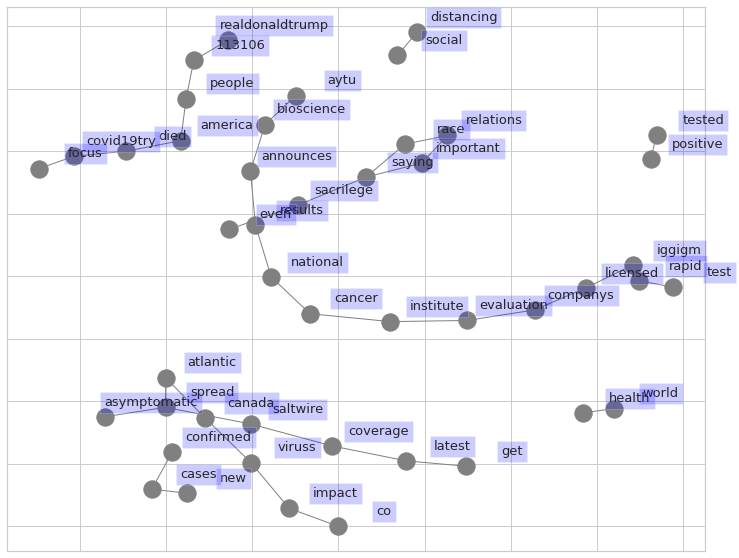

In [25]:
## Plotting network of most common bigrams

import networkx as nx

# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')

# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

fig, ax = plt.subplots(figsize=(12.5, 10))
pos = nx.spring_layout(G, k=1)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=12,
                 width=1,
                 edge_color='grey',
                 node_color='grey',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='blue', alpha=0.2),
            horizontalalignment='center', fontsize=13)
    
plt.show()

## Exploring additional tweet attributes with Cursor

In [0]:
tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2020-02-24').items(500)

users_locs = [[tweet.user.screen_name, tweet.user.location] for tweet in tweets]

In [27]:
users_locs[:5]

[['MediaModerated', 'United States'],
 ['gvasqjr', 'Southwest '],
 ['IRCommunities', 'Paisley, Scotland'],
 ['M_Loyaman', ''],
 ['kcmoemaw', '']]

In [28]:
## Creating dataframe of handles and user-defined locations

users_locs_df = pd.DataFrame(data=users_locs, columns=('users', 'locations'))
users_locs_df.head(20)

,users,locations
0,MediaModerated,United States
1,gvasqjr,Southwest
2,IRCommunities,"Paisley, Scotland"
3,M_Loyaman,
4,kcmoemaw,
5,enticingtech,
6,csmdevelopment,
7,andrespardoa,"Colombia/New York, NY"
8,LouiseDFID,Khartoum
9,RamonaHoogeveen,"ÜT: 52.123024,5.196485"


In [29]:
## Replacing blanks with NaN vals

users_locs_df = users_locs_df.replace('',np.nan)
users_locs_df.head(20)

,users,locations
0,MediaModerated,United States
1,gvasqjr,Southwest
2,IRCommunities,"Paisley, Scotland"
3,M_Loyaman,NaN
4,kcmoemaw,NaN
5,enticingtech,NaN
6,csmdevelopment,NaN
7,andrespardoa,"Colombia/New York, NY"
8,LouiseDFID,Khartoum
9,RamonaHoogeveen,"ÜT: 52.123024,5.196485"


In [30]:
## Dropping NaN rows

users_locs_df = users_locs_df.dropna()
users_locs_df.head(20)

,users,locations
0,MediaModerated,United States
1,gvasqjr,Southwest
2,IRCommunities,"Paisley, Scotland"
7,andrespardoa,"Colombia/New York, NY"
8,LouiseDFID,Khartoum
9,RamonaHoogeveen,"ÜT: 52.123024,5.196485"
10,PulpNews,USA
11,nxtbesthing,"Houston, TX"
12,AP24x7live,"Vijayawada, India"
13,poutingpou,West Midlands


In [31]:
len(users_locs_df)

396

(-0.5, 999.5, 599.5, -0.5)

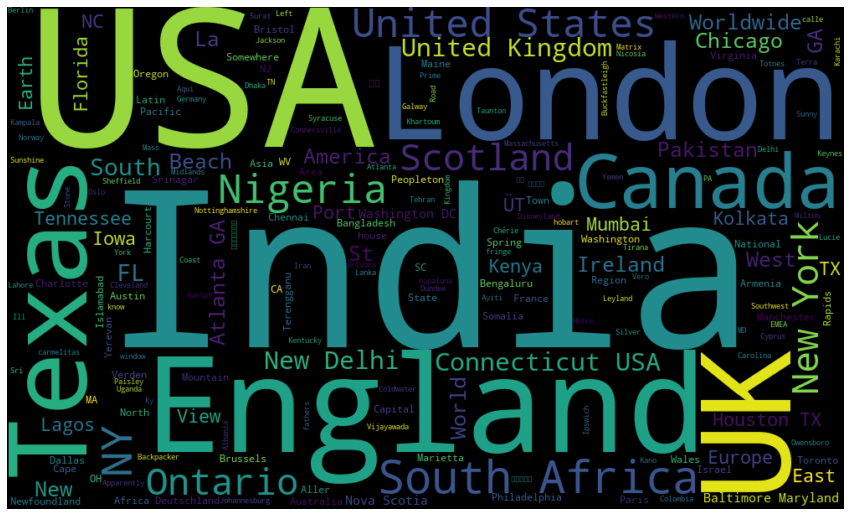

In [32]:
## turning list of locs into one big string and visualising location counts as WordCloud

all_locs_string = ' '.join(users_locs_df['locations'].tolist())

from wordcloud import WordCloud

word_cloud = WordCloud(width=1000, height=600).generate(all_locs_string)

plt.figure(figsize=(15,15))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')

In [33]:
## determining most popular tweet based on count of retweets

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2020-02-24').items(500)

users_locs_rts = [[tweet.user.screen_name, tweet.user.location, tweet.retweet_count, tweet.created_at, tweet.text] for tweet in tweets]
users_locs_rts[:5]


[['KamvaDiko',
  '',
  0,
  datetime.datetime(2020, 6, 9, 12, 9, 31),
  '#JuliusMalema\n#UfsMustFall\n#Covid_19\n#day75oflockdown\n#VUTmustfall\n\n 2021 if doors do not open for us, we are using… https://t.co/g5B7BEGym4'],
 ['SeedhibaatF',
  'Bengaluru, India',
  0,
  datetime.datetime(2020, 6, 9, 12, 9, 31),
  'Jyotiraditya Scindia tests positive for COVID-19, admitted in Max hospital https://t.co/Swc9lEE3bU via @Seedhi Baat'],
 ['WDoninck',
  'Brugge, Belgium',
  0,
  datetime.datetime(2020, 6, 9, 12, 9, 30),
  '@HansKoppies @nhdagblad Half of Singapore’s coronavirus cases show no symptoms, top official says https://t.co/skJ5LXbNR5'],
 ['MangusColorado',
  'Texas',
  0,
  datetime.datetime(2020, 6, 9, 12, 9, 30),
  'Coronavirus Analysis You Will Rarely See Reported https://t.co/u9ZeFgv2BA'],
 ['DavidDavisMP',
  '',
  0,
  datetime.datetime(2020, 6, 9, 12, 9, 30),
  'Last night I spoke in the SO24 Emergency Debate on the business of the House of Commons during the coronavirus pand… ht

In [34]:
## Creating dataframe with attributes including retweets and timestamp

users_locs_rts_df = pd.DataFrame(data=users_locs_rts, columns=('user', 'location', 'retweets', 'time', 'tweet'))
users_locs_rts_df.head(20)

,user,location,retweets,time,tweet
0,KamvaDiko,,0,2020-06-09 12:09:31,"#JuliusMalema\n#UfsMustFall\n#Covid_19\n#day75oflockdown\n#VUTmustfall\n\n 2021 if doors do not open for us, we are using… https://t.co/g5B7BEGym4"
1,SeedhibaatF,"Bengaluru, India",0,2020-06-09 12:09:31,"Jyotiraditya Scindia tests positive for COVID-19, admitted in Max hospital https://t.co/Swc9lEE3bU via @Seedhi Baat"
2,WDoninck,"Brugge, Belgium",0,2020-06-09 12:09:30,"@HansKoppies @nhdagblad Half of Singapore’s coronavirus cases show no symptoms, top official says https://t.co/skJ5LXbNR5"
3,MangusColorado,Texas,0,2020-06-09 12:09:30,Coronavirus Analysis You Will Rarely See Reported https://t.co/u9ZeFgv2BA
4,DavidDavisMP,,0,2020-06-09 12:09:30,Last night I spoke in the SO24 Emergency Debate on the business of the House of Commons during the coronavirus pand… https://t.co/5GpzpJVvQs
5,nikeshavaiya,"Gujarat, India",0,2020-06-09 12:09:30,Me after reading covid-19 global data every morning....\n\nSabse aage honge hindustani 🙇🏻‍♂️
6,EconomicTimes,,0,2020-06-09 12:09:30,#Pakistan developers fake #AarogyaSetu app to access Indian users' data.\n\nTrack live updates on #coronavirus here… https://t.co/2AByhRroPb
7,Bigmummh,,0,2020-06-09 12:09:30,"@Rozkez67 @deane258 @AlokSharma_RDG Regardless of whether he's got Covid-19 he was (/is) ill and was in the HoC, co… https://t.co/QOGSlhi6eb"
8,Tweetologist3,"New Jersey, USA",0,2020-06-09 12:09:29,covid-19 News https://t.co/PYn3u7riUF
9,SikiTravels,"Cape Town, South Africa",0,2020-06-09 12:09:29,As a PR Pro I am invested in understanding the effects of Covid19 &amp; lockdown on the media landscape.\n\nI’m watching… https://t.co/Us8ZmSWAsw


In [35]:
## Sorting to see most popular tweets

users_locs_rts_df.sort_values('retweets', ascending=False)

,user,location,retweets,time,tweet
409,MONEYEMPIRE,All AROUND THE WORLD,3,2020-06-09 12:08:03,$AYTU BioScience Announces Results from a National Cancer Institute Evaluation of the Companys Licensed COVID-19 IgG/IgM Rapid Test
314,ZarrarAnzal,,3,2020-06-09 12:08:23,#Eliminate_PTM_BLA\nDawar is seen telling the villagers that coronavirus is ‘nothing’ and that it is ‘just a way to make money\n@TM__Rocks
222,PCMaticSpox,United States,2,2020-06-09 12:08:46,.@pcmatic CEO Rob Cheng via @FoxBusiness: “With the probability of there being a second wave of #COVID19 in the fal… https://t.co/Y7PCLD10eT
354,WSJPolitics,"Washington, D.C.",2,2020-06-09 12:08:16,Confirmed coronavirus cases increased faster in the past week than the week prior in more than a dozen U.S. states. https://t.co/l0ddqbmeIZ
445,haaretzcom,Israel,2,2020-06-09 12:07:58,U.S. Coronavirus Cases Surge in Southwestern States | INTERACTIVE https://t.co/idk89pWOSE
...,...,...,...,...,...
159,Needle2,,0,2020-06-09 12:09:00,@Coastliner14 @Jaydenbull3 @zukibites @stewpotdudders @AlfMegoa I'm not claiming it isn't. They used the lock-down… https://t.co/ykgtsCAPuL
158,RussPoulin,"Longmont, CO",0,2020-06-09 12:09:00,These millennials are reinventing the multibillion-dollar education industry during coronavirus https://t.co/RjBGmWPrtH
157,asabeshehu,Nigeria/Ghana/Germany/USA,0,2020-06-09 12:09:00,How Many More Will Die From Fear of the Coronavirus? #Yuta #wayv_turnbacktime #고인의명복 https://t.co/DSblNcRUzw
156,MDEdgeTweets,"Rockville, MD and Parsippany, NJ",0,2020-06-09 12:09:00,Black children with #COVID19 are linked to a higher risk of developing the Kawasaki-like inflammatory condition in… https://t.co/CfpPh0yxND


In [36]:
# Determining timeframe over which the 500 most recent COVID-19 tweets have been posted
# firstly the earliest tweet

users_locs_rts_df['time'].min()

Timestamp('2020-06-09 12:07:42')

In [37]:
# last tweet

users_locs_rts_df['time'].max()

Timestamp('2020-06-09 12:09:31')

In [38]:
# 35 seconds
# Taking a more detailed look at the rate of COVID-19 related tweets using a groupby

users_locs_rts_df.groupby('time').count().sort_values('user')

,user,location,retweets,tweet
time,,,,
2020-06-09 12:08:42,1,1,1,1
2020-06-09 12:08:48,1,1,1,1
2020-06-09 12:08:12,1,1,1,1
2020-06-09 12:07:49,1,1,1,1
2020-06-09 12:09:12,1,1,1,1
...,...,...,...,...
2020-06-09 12:09:01,10,10,10,10
2020-06-09 12:09:02,11,11,11,11
2020-06-09 12:09:25,12,12,12,12
